In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("../raw_data/g_wine_preprocessing.txt", "rb") as fp:   # Unpickling
    wine_sentences = pickle.load(fp)

In [3]:
with open("../raw_data/b_list_food_preprocessed.txt", "rb") as fp:   # Unpickling
    food_sentences = pickle.load(fp)

In [4]:
wine_sentences

[['aroma_include',
  'tropical',
  'fruit',
  'broom',
  'brimstone',
  'dried_herb',
  'palate',
  'overly',
  'expressive',
  'offering',
  'unripened',
  'apple',
  'citrus',
  'dried_sage',
  'alongside',
  'brisk',
  'acidity'],
 ['ripe',
  'fruity',
  'wine',
  'smooth',
  'still',
  'structured',
  'firm',
  'tannin',
  'filled',
  'juicy',
  'red',
  'berry',
  'fruit',
  'freshened',
  'acidity',
  'already',
  'drinkable',
  'although',
  'certainly',
  'better'],
 ['tart',
  'snappy',
  'flavor',
  'lime',
  'flesh',
  'rind',
  'dominate',
  'green',
  'pineapple',
  'poke',
  'crisp',
  'acidity',
  'underscoring',
  'flavor',
  'wine',
  'stainless_steel_fermented'],
 ['pineapple',
  'rind',
  'lemon_pith',
  'orange_blossom',
  'start',
  'aroma',
  'palate',
  'bit',
  'opulent',
  'note',
  'honey',
  'drizzled',
  'guava',
  'mango',
  'giving',
  'way',
  'slightly',
  'astringent',
  'semidry',
  'finish'],
 ['much',
  'like',
  'regular',
  'bottling',
  'come_acro

In [5]:
sentences = wine_sentences + food_sentences

In [6]:
sentences

[['aroma_include',
  'tropical',
  'fruit',
  'broom',
  'brimstone',
  'dried_herb',
  'palate',
  'overly',
  'expressive',
  'offering',
  'unripened',
  'apple',
  'citrus',
  'dried_sage',
  'alongside',
  'brisk',
  'acidity'],
 ['ripe',
  'fruity',
  'wine',
  'smooth',
  'still',
  'structured',
  'firm',
  'tannin',
  'filled',
  'juicy',
  'red',
  'berry',
  'fruit',
  'freshened',
  'acidity',
  'already',
  'drinkable',
  'although',
  'certainly',
  'better'],
 ['tart',
  'snappy',
  'flavor',
  'lime',
  'flesh',
  'rind',
  'dominate',
  'green',
  'pineapple',
  'poke',
  'crisp',
  'acidity',
  'underscoring',
  'flavor',
  'wine',
  'stainless_steel_fermented'],
 ['pineapple',
  'rind',
  'lemon_pith',
  'orange_blossom',
  'start',
  'aroma',
  'palate',
  'bit',
  'opulent',
  'note',
  'honey',
  'drizzled',
  'guava',
  'mango',
  'giving',
  'way',
  'slightly',
  'astringent',
  'semidry',
  'finish'],
 ['much',
  'like',
  'regular',
  'bottling',
  'come_acro

In [7]:
from gensim.models import Word2Vec

In [8]:
wine_word2vec_model = Word2Vec(sentences, size=300, min_count=8, iter=15)
print(wine_word2vec_model)

Word2Vec(vocab=32303, size=300, alpha=0.025)


In [9]:
wine_word2vec_model.train(sentences,epochs=10,total_examples=len(sentences))

(158992660, 170833990)

In [21]:
wine_word2vec_model.save('../raw_data/food_word2vec_model.bin')

In [22]:
wine_word2vec_model = Word2Vec.load("../raw_data/food_word2vec_model.bin")

In [12]:
wine_word2vec_model.wv.get_vector('acid')

array([ 5.56785107e-01,  1.65412676e+00, -2.51402676e-01, -8.56791794e-01,
        1.79483545e+00,  2.34388530e-01,  2.22130370e+00, -6.34795725e-01,
       -2.79318303e-01,  6.08731508e-01, -1.05791354e+00,  1.48825085e+00,
        1.20318019e+00, -1.32870841e+00,  1.50574696e+00, -1.20169497e+00,
       -1.16188812e+00, -9.96305525e-01, -2.24434450e-01,  1.12981057e+00,
       -9.62224454e-02, -2.02230024e+00,  8.96279931e-01,  2.75772858e+00,
       -7.38753855e-01, -4.22912985e-01,  2.01208091e+00,  1.95044613e+00,
       -1.98447609e+00, -1.93363512e+00, -6.24102354e-02,  3.25694203e-01,
       -1.57423407e-01, -8.35093409e-02,  3.47195752e-02,  1.63959146e+00,
        2.17972994e+00,  1.23392415e+00,  1.92438710e+00, -8.44132781e-01,
        9.56117928e-01, -7.14404166e-01, -6.54602468e-01, -8.04287910e-01,
        8.69457304e-01, -1.27651477e+00,  3.59883398e-01,  2.77142197e-01,
       -1.79155126e-01,  1.36384845e+00,  1.09487367e+00,  7.64072873e-03,
       -1.69132799e-01, -

In [13]:
wine_word2vec_model.wv.most_similar('salt')

[('sea_salt', 0.6318942308425903),
 ('sodium', 0.5676918625831604),
 ('table_salt', 0.5334199070930481),
 ('kosher_salt', 0.5282807946205139),
 ('salty', 0.5138798952102661),
 ('saltiness', 0.4998376667499542),
 ('sodium_chloride', 0.4958387613296509),
 ('seasoning', 0.4925861954689026),
 ('salt_pepper', 0.49110478162765503),
 ('onion_powder', 0.47595250606536865)]

In [14]:
wine_word2vec_model.wv.most_similar('fat')

[('fat_calorie', 0.6271458864212036),
 ('saturated_fat', 0.6203345060348511),
 ('fat_cholesterol', 0.6059654355049133),
 ('fat_content', 0.5678936243057251),
 ('calorie_fat', 0.5590714812278748),
 ('carbs', 0.5382946729660034),
 ('calorie', 0.5343432426452637),
 ('sodium', 0.5210204124450684),
 ('protein', 0.5144471526145935),
 ('polyunsaturated', 0.5122396945953369)]

In [15]:
wine_word2vec_model.wv.most_similar('honey')

[('raw_honey', 0.5153502225875854),
 ('apricot', 0.5058929324150085),
 ('honeysuckle', 0.4988706111907959),
 ('honeycomb', 0.49717193841934204),
 ('honeyed', 0.48925912380218506),
 ('dried_apricot', 0.48327407240867615),
 ('peach_apricot', 0.4787447452545166),
 ('peach', 0.4742109775543213),
 ('agave_syrup', 0.4670575261116028),
 ('orange_blossom_honey', 0.460744708776474)]

In [16]:
wine_word2vec_model.wv.most_similar('citrus')

[('lime', 0.7040707468986511),
 ('grapefruit', 0.6836917400360107),
 ('lemon', 0.6780190467834473),
 ('melon', 0.6600759625434875),
 ('pear', 0.6520712375640869),
 ('lemon_lime', 0.6313595771789551),
 ('tangerine', 0.6253106594085693),
 ('citrusy', 0.6170397996902466),
 ('lemon_zest', 0.6068723201751709),
 ('peach', 0.6041163206100464)]

In [17]:
X=wine_word2vec_model[wine_word2vec_model.wv.index2entity[:100]]
df=pd.DataFrame(X)
df.shape
df.head()

<ipython-input-17-f36ca8d383d3>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=wine_word2vec_model[wine_word2vec_model.wv.index2entity[:100]]


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.390055,1.656646,0.306790,-1.285913,-0.180197,-0.714934,1.797613,-1.193505,-0.751886,1.728481,...,-0.394060,-2.037577,0.558894,0.373093,-0.008879,2.312959,0.939098,0.437963,0.387482,1.070515
1,-0.178762,-0.235803,-0.304199,-0.462897,0.683016,0.126822,0.225843,0.275691,0.413215,-0.857052,...,-0.908342,-0.812645,0.120313,-0.940820,-0.059151,0.607055,0.703638,-0.632080,1.292083,0.867010
2,-2.077703,1.762214,-0.400118,-1.153058,-0.119143,0.885821,1.344923,-1.335053,-1.650967,0.994073,...,-0.081889,-0.244918,0.417492,-0.240579,-0.095561,1.163912,0.029228,0.672266,0.024448,1.614752
3,-0.557779,0.443375,0.591251,-0.472180,0.705938,1.073363,-1.177528,0.204318,0.521460,-0.714667,...,-0.343057,0.783934,-0.048304,0.092741,1.058518,-1.568932,0.747447,0.348460,-0.058182,0.135784
4,0.628369,0.260862,-0.896192,0.496225,-0.355285,-0.426109,-0.262661,-0.345364,0.452362,-0.273140,...,-1.195665,1.012953,-0.403993,-1.140071,-1.198089,-0.346531,0.079884,-1.223362,0.198126,0.300397


In [18]:
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


IndexError: index 100 is out of bounds for axis 0 with size 100

/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/matplotlib/text.py:1346: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/matplotlib/text.py:1348: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/matplotlib/text.py:824: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/matplotlib/text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Users/benoit/.pyenv/versions/3.8.6/envs/food2wine/lib/python3.8/site-packages/matplotlib/text.py:686: ComplexWarning: Casting com

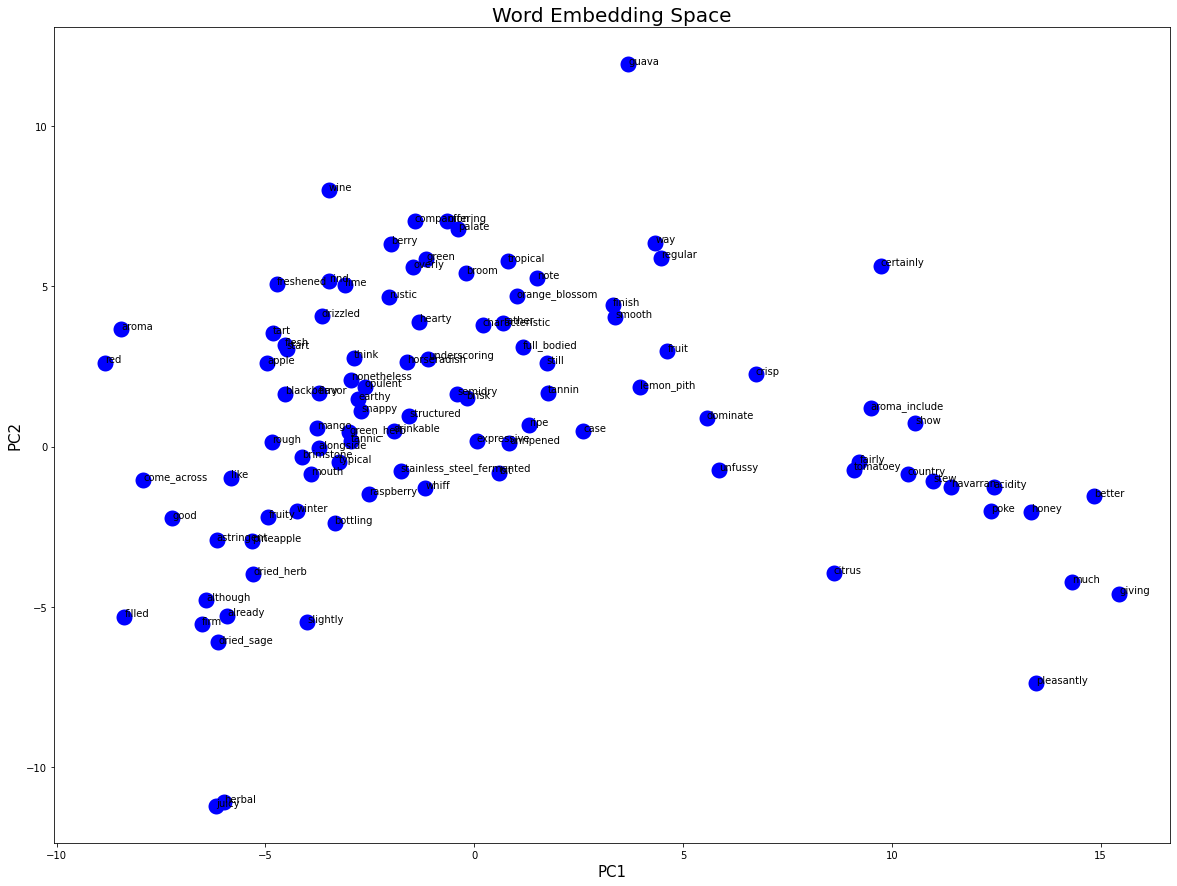

In [19]:
plt.figure(figsize=(20,15))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(wine_word2vec_model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

In [ ]:
wine_word2vec_model.wv.index2entity[:30]

In [ ]:
test = pd.read_csv('../raw_data/descriptor_mapping.csv')

In [ ]:
test.head(5)